In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame({
    "studyhours":[1,2,3,4,5],
    "marks":[2,4,5,4,5]
})

In [4]:
df

,studyhours,marks
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [5]:
X=df[["studyhours"]]
Y=df[["marks"]]

In [6]:
model=LinearRegression()
model.fit(X,Y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
X_line=pd.DataFrame(
    {"studyhours":np.linspace(X.min()[0],X.max()[0],100)}
)
Y_line=model.predict(X_line)

In [15]:
X_line

,studyhours
0,1.000000
1,1.040404
2,1.080808
3,1.121212
4,1.161616
...,...
95,4.838384
96,4.878788
97,4.919192
98,4.959596


In [16]:
print("slope(m):",model.coef_[0])
print("intercept(m):",model.intercept_)

slope(m): [0.6]
intercept(m): [2.2]


In [17]:
X_new=pd.DataFrame({"studyhours":[4.0]})
Y_new=model.predict(X_new)
print("predited value:",Y_new)

predited value: [[4.6]]


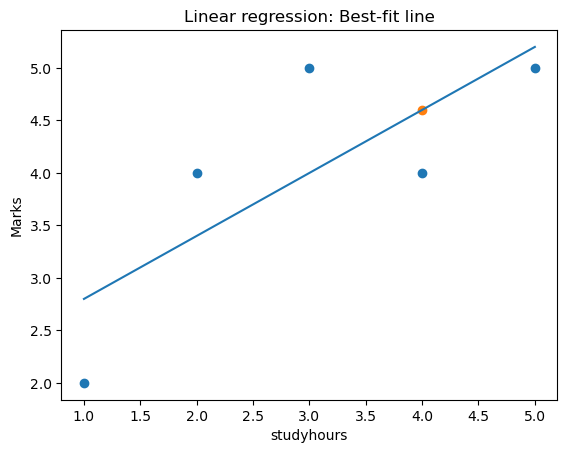

In [18]:
plt.figure()
plt.scatter(X,Y)
plt.plot(X_line,Y_line)
plt.scatter(X_new,Y_new)
plt.xlabel("studyhours")
plt.ylabel("Marks")
plt.title("Linear regression: Best-fit line")
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
Y_pred=model.predict(X)
mse=mean_squared_error(Y,Y_pred)
print("mse:", mse)

mse: 0.4799999999999998


# Multiple linear regression

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [43]:
df=pd.read_csv(r"C:\Users\yvsur\Downloads\MLR_Study_marks.csv")

In [44]:
df

,Study_Hours,Attendance,Sleep_Hours,Marks
0,2,60,5,48
1,3,62,5,50
2,4,65,6,55
3,5,68,6,58
4,6,70,6,60
...,...,...,...,...
72,6,79,6,68
73,7,82,7,71
74,8,85,7,75
75,9,88,7,78


In [45]:

x=df[["Study_Hours","Attendance","Sleep_Hours"]]
y=df["Marks"]

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [47]:
model=LinearRegression()
model.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
print("\nModel Intercept:",model.intercept_)
print("Model coefficients:",model.coef_)


Model Intercept: -0.6066101740192664
Model coefficients: [0.9420473  0.74064362 0.57973332]


In [49]:
y_pred=model.predict(x_test)

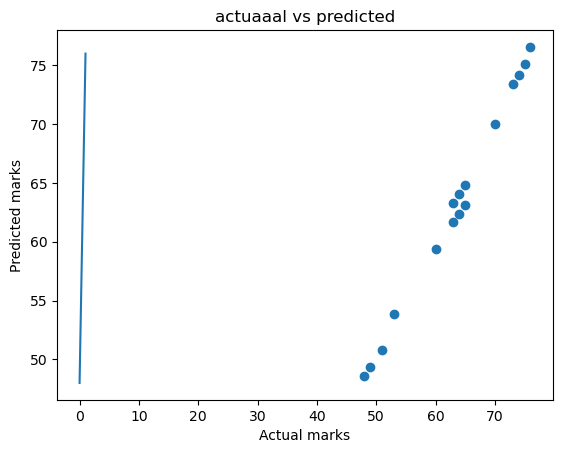

In [50]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual marks")
plt.ylabel("Predicted marks")
plt.title("actuaaal vs predicted")
plt.plot([y_test.min(),y_test.max()],)
plt.show()

In [51]:
Y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("\nMean squared error:",mse)
print("R^2 score:",r2)


Mean squared error: 0.6339347099085475
R^2 score: 0.991984625587169


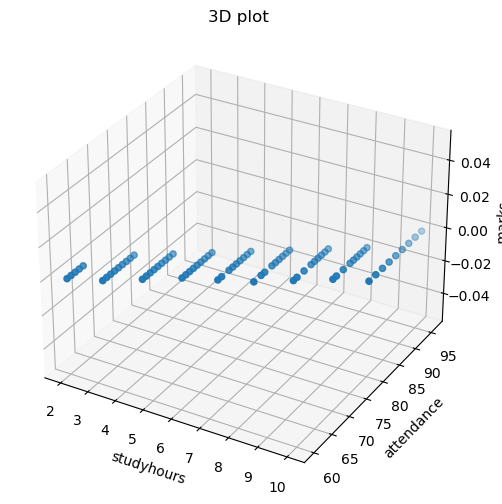

In [54]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111, projection="3d")
ax.scatter(df["Study_Hours"],df["Attendance"])
ax.set_xlabel("studyhours")
ax.set_ylabel("attendance")
ax.set_zlabel("marks")
ax.set_title("3D plot ")
plt.show()